In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Basics _ Working with data and Time 

In [2]:
df = pd.read_csv('HistoricalQuotes.csv')
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/20/2019,$279.44,68972090,$282.23,$282.65,$278.56
1,12/19/2019,$280.02,24626950,$279.5,$281.18,$278.95
2,12/18/2019,$279.74,29024690,$279.8,$281.9,$279.12
3,12/17/2019,$280.41,28575800,$279.57,$281.77,$278.8
4,12/16/2019,$279.86,32081110,$277,$280.79,$276.98


In [3]:
# Date time index
# resampling

In [4]:
type(df['Date'][0])

str

In [5]:
df = pd.read_csv('HistoricalQuotes.csv', parse_dates=['Date'])
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2019-12-20,$279.44,68972090,$282.23,$282.65,$278.56
1,2019-12-19,$280.02,24626950,$279.5,$281.18,$278.95
2,2019-12-18,$279.74,29024690,$279.8,$281.9,$279.12
3,2019-12-17,$280.41,28575800,$279.57,$281.77,$278.8
4,2019-12-16,$279.86,32081110,$277,$280.79,$276.98


In [6]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
df = pd.read_csv('HistoricalQuotes.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-20,$279.44,68972090,$282.23,$282.65,$278.56
2019-12-19,$280.02,24626950,$279.5,$281.18,$278.95
2019-12-18,$279.74,29024690,$279.8,$281.9,$279.12
2019-12-17,$280.41,28575800,$279.57,$281.77,$278.8
2019-12-16,$279.86,32081110,$277,$280.79,$276.98


In [8]:
df.columns

Index([' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

In [9]:
df[' Close/Last']=df[' Close/Last'].str.replace(r'\D', '')

In [10]:
df[' Open']=df[' Open'].str.replace(r'\D', '')

In [11]:
df[' High']=df[' High'].str.replace(r'\D', '')

In [12]:
df[' Low']=df[' Low'].str.replace(r'\D', '')

In [13]:
df

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-20,27944,68972090,28223,28265,27856
2019-12-19,28002,24626950,2795,28118,27895
2019-12-18,27974,29024690,2798,2819,27912
2019-12-17,28041,28575800,27957,28177,2788
2019-12-16,27986,32081110,277,28079,27698
2019-12-13,27515,33432810,27146,2753,27093
2019-12-12,27146,34437040,26778,2725599,267321
2019-12-11,27077,19723390,26881,2711,2685
2019-12-10,26848,22632380,2686,27007,26586


In [14]:
df['2019-'][' Open'].mean()

1.4854357646306734e+85

In [15]:
df['2019-12-20': '2019-12-17'][' Open'].mean()

7.055819881995699e+16

In [16]:
df[' Close/Last'].astype(int).resample('Q').mean()

Date
2019-12-31    27050.736842
Freq: Q-DEC, Name:  Close/Last, dtype: float64

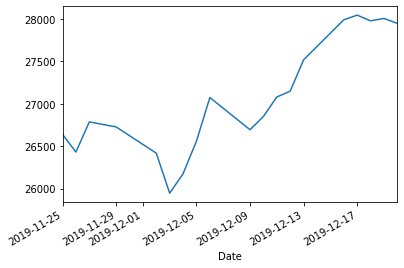

In [17]:
df[' Close/Last'].astype(int).plot()

In [18]:
# filling misssing date

df.asfreq('D', method='pad')

,Close/Last,Volume,Open,High,Low
Date,,,,,


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19 entries, 2019-12-20 to 2019-11-25
Data columns (total 5 columns):
 Close/Last    19 non-null object
 Volume        19 non-null int64
 Open          19 non-null object
 High          19 non-null object
 Low           19 non-null object
dtypes: int64(1), object(4)
memory usage: 1.5+ KB


In [20]:
df.index

DatetimeIndex(['2019-12-20', '2019-12-19', '2019-12-18', '2019-12-17',
               '2019-12-16', '2019-12-13', '2019-12-12', '2019-12-11',
               '2019-12-10', '2019-12-09', '2019-12-06', '2019-12-05',
               '2019-12-04', '2019-12-03', '2019-12-02', '2019-11-29',
               '2019-11-27', '2019-11-26', '2019-11-25'],
              dtype='datetime64[ns]', name='Date', freq=None)

###  Time Series Forecasting _ AirPassengers

##### Auto Regression
Auto regression predicts the values of future time periods as a function of values at previous time periods. 
Predictions of auto regression may fit the data better than that of naïve methods, but it may not be able to account for seasonality.

##### ARIMA Model
An auto-regressive integrated moving-average models the value of a variable as a linear function of previous values and residual errors at previous time steps of a stationary timeseries. However, the real world data may be non-stationary and have seasonality, thus Seasonal-ARIMA and Fractional-ARIMA were developed. ARIMA works on univariate time series, to handle multiple

In [3]:
df1 = pd.read_csv('AirPassengers.csv')
df1.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [22]:
df1['Month']= pd.to_datetime( df1['Month']  , infer_datetime_format=True)
indexedDataset= df1.set_index(['Month'])

In [23]:
from datetime import datetime

indexedDataset.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


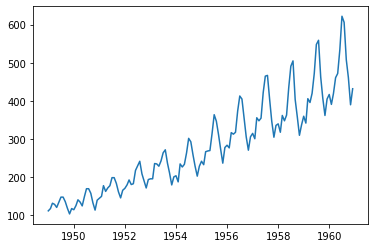

In [24]:
plt.plot(indexedDataset)

In [25]:
#rolling satistics

rolmean =indexedDataset.rolling(window=12).mean()

rolstd =indexedDataset.rolling(window=12).std()

rolmean,rolstd

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 1949-07-01          NaN
 1949-08-01          NaN
 1949-09-01          NaN
 1949-10-01          NaN
 1949-11-01          NaN
 1949-12-01   126.666667
 1950-01-01   126.916667
 1950-02-01   127.583333
 1950-03-01   128.333333
 1950-04-01   128.833333
 1950-05-01   129.166667
 1950-06-01   130.333333
 1950-07-01   132.166667
 1950-08-01   134.000000
 1950-09-01   135.833333
 1950-10-01   137.000000
 1950-11-01   137.833333
 1950-12-01   139.666667
 1951-01-01   142.166667
 1951-02-01   144.166667
 1951-03-01   147.250000
 1951-04-01   149.583333
 1951-05-01   153.500000
 1951-06-01   155.916667
 ...                 ...
 1958-07-01   376.333333
 1958-08-01   379.500000
 1958-09-01   379.500000
 1958-10-01   380.500000
 1958-11-01   380.916667
 1958-12-01   381.000000
 1959-01-01   382.666667


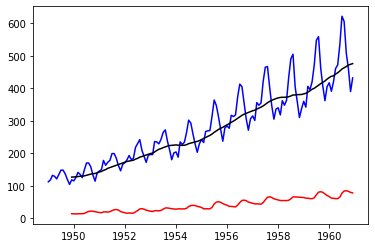

In [26]:
plt.plot(indexedDataset, color='blue' )
plt.plot(rolstd, color='red')
plt.plot(rolmean, color='black');


In [27]:
from statsmodels.tsa.stattools import adfuller


dftest =adfuller(indexedDataset['#Passengers'], autolag='AIC')

dfoutput =pd.Series(dftest[0:4], index=['Test statistic','p-value','#lags used','Number of observation used'])

for key,value in dftest[4].items():
    dfoutput['critical value(%s)' %key] = value
    
print(dfoutput)

Test statistic                  0.815369
p-value                         0.991880
#lags used                     13.000000
Number of observation used    130.000000
critical value(1%)             -3.481682
critical value(5%)             -2.884042
critical value(10%)            -2.578770
dtype: float64


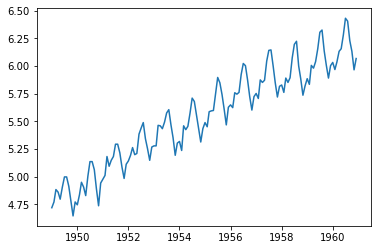

In [28]:
dflog =np.log(indexedDataset)
plt.plot(dflog)

In [29]:
#rolling satistics

rolmeanlog =dflog.rolling(window=12).mean() # moving avg

rolstdlog =dflog.rolling(window=12).std()  # moving var

rolmeanlog,rolstdlog

(            #Passengers
 Month                  
 1949-01-01          NaN
 1949-02-01          NaN
 1949-03-01          NaN
 1949-04-01          NaN
 1949-05-01          NaN
 1949-06-01          NaN
 1949-07-01          NaN
 1949-08-01          NaN
 1949-09-01          NaN
 1949-10-01          NaN
 1949-11-01          NaN
 1949-12-01     4.836178
 1950-01-01     4.838381
 1950-02-01     4.843848
 1950-03-01     4.849344
 1950-04-01     4.853133
 1950-05-01     4.855843
 1950-06-01     4.864066
 1950-07-01     4.875614
 1950-08-01     4.887163
 1950-09-01     4.899658
 1950-10-01     4.908927
 1950-11-01     4.916578
 1950-12-01     4.930824
 1951-01-01     4.950141
 1951-02-01     4.964670
 1951-03-01     4.984089
 1951-04-01     4.999795
 1951-05-01     5.026394
 1951-06-01     5.041214
 ...                 ...
 1958-07-01     5.919627
 1958-08-01     5.926146
 1958-09-01     5.926146
 1958-10-01     5.928980
 1958-11-01     5.930335
 1958-12-01     5.930582
 1959-01-01     5.935346


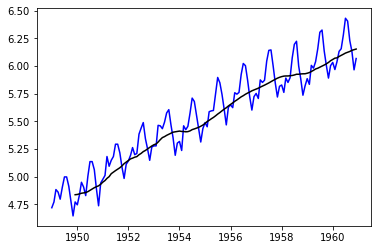

In [30]:
plt.plot(dflog, color='blue' )

plt.plot(rolmeanlog, color='black');

# plt.plot(rolstdlog, color='red')

In [31]:
dflogminusavg = dflog- rolmeanlog 
dflogminusavg.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


In [32]:
dflogminusavg.dropna(inplace=True)
dflogminusavg.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [33]:
def test_stationary(timeseries):

        #rolling satistics

        rolmeanlog =timeseries.rolling(window=12).mean() # moving avg

        rolstdlog =timeseries.rolling(window=12).std()  # moving var

        #plot
        plt.plot(timeseries, color='blue', label='Original' )
        plt.plot(rolstdlog, color='black', label='Rolling Avg')
        plt.plot(rolmeanlog, color='red', label='Rolling mean')
        plt.legend(loc='best');
        
        
        dftest =adfuller(timeseries['#Passengers'], autolag='AIC')

        dfoutput =pd.Series(dftest[0:4], index=['Test statistic','p-value','#lags used','Number of observation used'])

        for key,value in dftest[4].items():
              dfoutput['critical value(%s)' %key] = value
    
        print(dfoutput)

Test statistic                 -3.162908
p-value                         0.022235
#lags used                     13.000000
Number of observation used    119.000000
critical value(1%)             -3.486535
critical value(5%)             -2.886151
critical value(10%)            -2.579896
dtype: float64


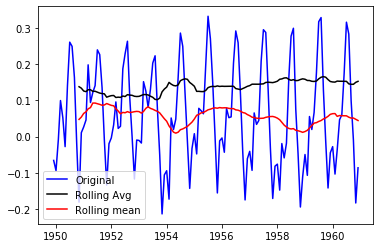

In [34]:
test_stationary(dflogminusavg)

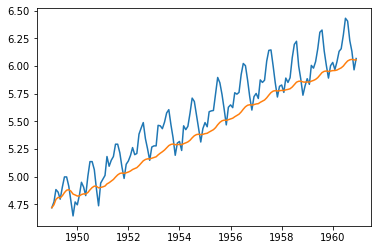

In [35]:
dfweg_avg =dflog.ewm(halflife=12, min_periods=0, adjust=True ).mean()
plt.plot(dflog);
plt.plot(dfweg_avg);

In [36]:
dflogminus_wg = dflog- dfweg_avg 
dflogminus_wg.head()

,#Passengers
Month,
1949-01-01,0.000000
1949-02-01,0.025339
1949-03-01,0.088967
1949-04-01,0.048028
1949-05-01,-0.012415


Test statistic                 -3.601262
p-value                         0.005737
#lags used                     13.000000
Number of observation used    130.000000
critical value(1%)             -3.481682
critical value(5%)             -2.884042
critical value(10%)            -2.578770
dtype: float64


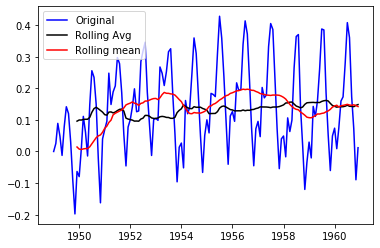

In [37]:
test_stationary(dflogminus_wg)

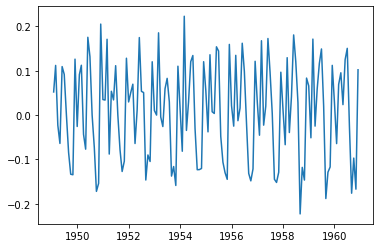

In [38]:
dflog_shift =dflog -dflog.shift()
plt.plot(dflog_shift)

In [42]:
dflog_shift.dropna(inplace=True)
dflog_shift.head()

,#Passengers
Month,
1949-02-01,0.052186
1949-03-01,0.112117
1949-04-01,-0.022990
1949-05-01,-0.064022
1949-06-01,0.109484


Test statistic                 -2.717131
p-value                         0.071121
#lags used                     14.000000
Number of observation used    128.000000
critical value(1%)             -3.482501
critical value(5%)             -2.884398
critical value(10%)            -2.578960
dtype: float64


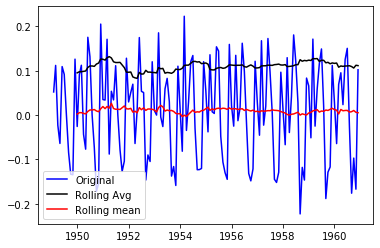

In [43]:
test_stationary(dflog_shift)

Test statistic               -6.332387e+00
p-value                       2.885059e-08
#lags used                    9.000000e+00
Number of observation used    1.220000e+02
critical value(1%)           -3.485122e+00
critical value(5%)           -2.885538e+00
critical value(10%)          -2.579569e+00
dtype: float64


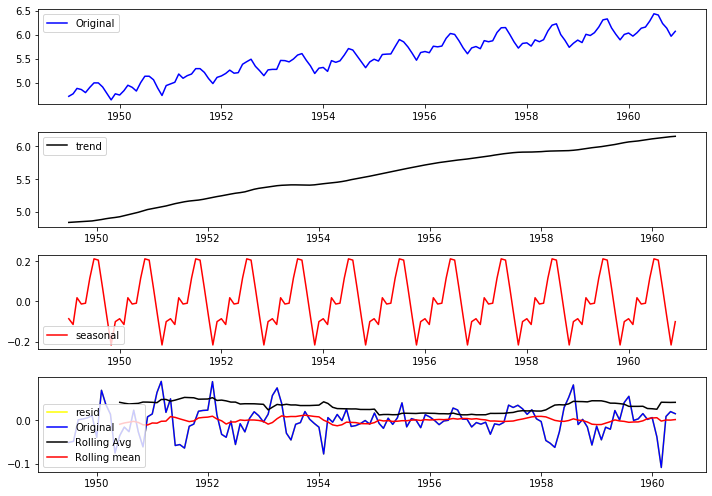

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dflog)


trend =decomposition.trend
seasonal =decomposition.seasonal
resid =decomposition.resid

#plot
plt.figure(figsize=(10,7))
plt.subplot(411)
plt.plot(dflog, color='blue', label='Original' )
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, color='black', label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, color='red', label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resid, color='yellow', label='resid')
plt.legend(loc='best')
plt.tight_layout()

decomposeddata =resid
decomposeddata.dropna(inplace=True)
test_stationary(decomposeddata)

Test statistic               -6.332387e+00
p-value                       2.885059e-08
#lags used                    9.000000e+00
Number of observation used    1.220000e+02
critical value(1%)           -3.485122e+00
critical value(5%)           -2.885538e+00
critical value(10%)          -2.579569e+00
dtype: float64


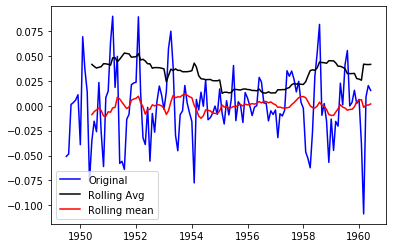

In [48]:

decomposeddata =resid
decomposeddata.dropna(inplace=True)
test_stationary(decomposeddata)

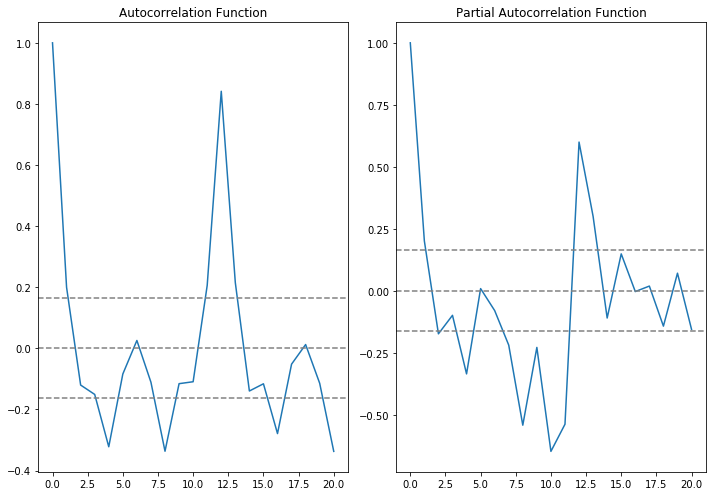

In [56]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf =acf(dflog_shift, nlags=20)
lag_pacf =pacf(dflog_shift, nlags=20, method='ols')

#Plot ACF:

plt.figure(figsize=(10,7))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(dflog_shift)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dflog_shift)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(dflog_shift)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(dflog_shift)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

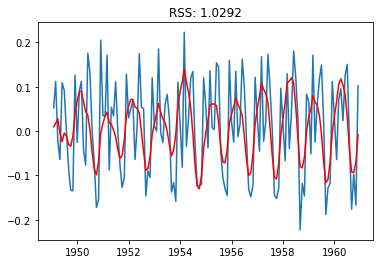

In [61]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults


model = ARIMA(dflog, order = (2,1,2))
results_AR = model.fit(disp = -1)
plt.plot(dflog_shift)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - dflog_shift['#Passengers'])**2)) #Residual sum of squares

C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

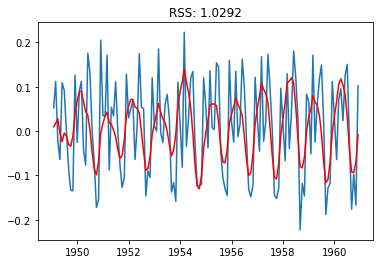

In [63]:
model = ARIMA(dflog, order = (2,1,2))
results_MA = model.fit(disp = -1)
plt.plot(dflog_shift)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - dflog_shift['#Passengers'])**2)) #Residual sum of squares

C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS: 1.0292')

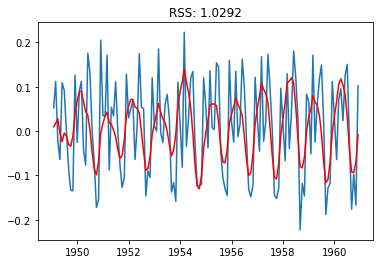

In [64]:
model = ARIMA(dflog, order = (2,1,2))
results_ARIMA = model.fit(disp = -1)
plt.plot(dflog_shift)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - dflog_shift['#Passengers'])**2)) #Residual sum of squares

In [65]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

In [66]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [76]:
predictions_ARIMA_log = pd.Series(dflog['#Passengers'][0], index=dflog.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1044')

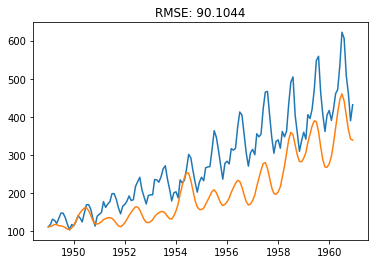

In [80]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['#Passengers'])**2)/len(indexedDataset['#Passengers'])))

<Figure size 720x504 with 0 Axes>

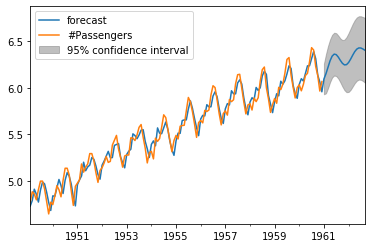

In [82]:
plt.figure(figsize=(10,7))
results_ARIMA.plot_predict(1, 164)
x=results_ARIMA.forecast(steps=120)

In [88]:
x

(array([6.09553397, 6.15281411, 6.22442976, 6.29241112, 6.34164725,
        6.36359367, 6.35784689, 6.33139306, 6.29597542, 6.26447717,
        6.24738331, 6.2502518 , 6.27275846, 6.30940322, 6.35151502,
        6.38988663, 6.41727387, 6.43011058, 6.42906693, 6.41842493,
        6.4045616 , 6.39403622, 6.39183091, 6.40019513, 6.41833703,
        6.44295418, 6.46937445, 6.49293994, 6.51024126, 6.5198904 ,
        6.52267585, 6.52112394, 6.51864535, 6.51853699, 6.52311933,
        6.53322372, 6.54812882, 6.56591569, 6.5841032 , 6.6003655 ,
        6.61313276, 6.6219279 , 6.62737797, 6.63093138, 6.63438699,
        6.63937996, 6.64696517, 6.65739854, 6.67015338, 6.68414265,
        6.69806639, 6.71077913, 6.72157744, 6.73033995, 6.73749822,
        6.74386391, 6.75037336, 6.75782606, 6.76668697, 6.77699838,
        6.78841334, 6.80032869, 6.81207209, 6.82308774, 6.8330715 ,
        6.84202506, 6.85022326, 6.85811236, 6.86617355, 6.87479167,
        6.88416319, 6.89426401, 6.90487906, 6.91

In [86]:
df1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
